In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import zipfile

with zipfile.ZipFile('../input/sample_submission.csv.zip') as z_samp:
    z_samp.extractall()

In [5]:
import zipfile

with zipfile.ZipFile('../input/train.csv.zip') as z:
    z.extractall()

In [6]:
with zipfile.ZipFile('../input/images.zip') as z_img:
    z_img.extractall()
    
with zipfile.ZipFile('../input/test.csv.zip') as z_test:
    z_test.extractall()

In [7]:
os.listdir()

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'classifier_r_fail.ipynb',
 'data',
 'images',
 'ml_06_지도학습_Logistic_Regression.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Visualizing PCA with Leaf Dataset.ipynb']

In [8]:
len(os.listdir('images'))

1584

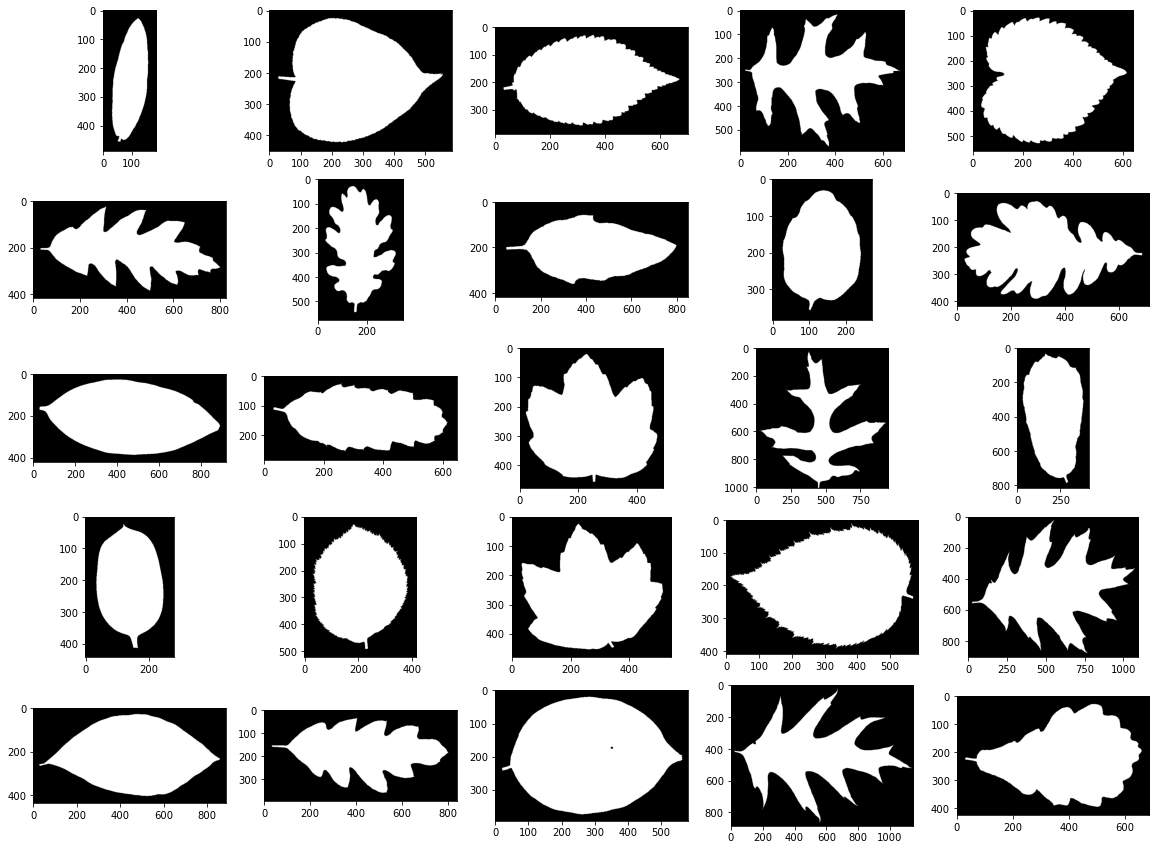

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('../01_leaf-classification/images',j))
    plt.imshow(img)

In [13]:
train_data=pd.read_csv('train.csv',index_col=False)
test_data=pd.read_csv('test.csv',index_col=False)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

encoder=LabelEncoder()
le=encoder.fit(train_data.species)
labels=le.transform(train_data.species)
classes=list(le.classes_)

In [15]:
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [16]:
test_data.columns

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

In [17]:
data=train_data.drop(['id','species'],axis=1)
test_id=test_data.id
test_data=test_data.drop(['id'],axis=1)

In [18]:
len(labels)

990

In [19]:
unique_lables=np.unique(labels)
unique_lables

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=.2,shuffle=True,stratify=labels)

In [21]:
from sklearn.svm import SVC


svc_model=SVC()

svc_model.fit(x_train,y_train)
svc_model.score(x_train,y_train)

0.9848484848484849

In [22]:
svc_model.score(x_test,y_test)

0.9040404040404041

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda=LinearDiscriminantAnalysis()

lda.fit(x_train,y_train)
lda.score(x_train,y_train)

1.0

In [25]:
lda.score(x_test,y_test)

0.9848484848484849

In [26]:
predicted=lda.predict_proba(test_data)

In [27]:
predicted

array([[4.42037397e-120, 8.41769346e-194, 6.83624806e-180, ...,
        7.65308134e-126, 4.97822193e-129, 2.20133994e-156],
       [2.11846082e-124, 7.86019972e-188, 7.07445488e-117, ...,
        2.42582645e-061, 5.23664842e-169, 5.59269996e-087],
       [5.46637463e-128, 1.00000000e+000, 4.78067337e-171, ...,
        8.09827763e-167, 4.88104293e-239, 1.02656754e-090],
       ...,
       [3.32907117e-086, 1.01409196e-160, 1.27518844e-133, ...,
        6.35740532e-086, 3.65560770e-145, 1.53954261e-088],
       [3.29480406e-123, 3.12162208e-176, 1.99126379e-113, ...,
        1.44806276e-082, 5.45103199e-186, 7.80100630e-112],
       [3.07207155e-165, 1.03560028e-205, 1.77041803e-140, ...,
        7.08201180e-099, 2.83144535e-200, 3.98489404e-123]])

In [28]:
sample_df=pd.read_csv('sample_submission.csv',index_col=False)
sample_df

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
590,1577,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
591,1579,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
592,1580,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [29]:
df_sub=pd.DataFrame(predicted,columns=sample_df.columns[1:])

In [30]:
df_sub1=pd.DataFrame(test_id)

In [31]:
final_sub=pd.concat([df_sub1,df_sub],axis=1)

In [32]:
final_sub

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,4.420374e-120,8.417693e-194,6.836248e-180,1.768669e-64,0.000000e+00,1.257906e-129,6.949900e-175,1.214172e-163,2.170495e-141,...,1.613739e-251,4.582953e-113,8.228648e-190,5.886467e-130,2.033779e-134,2.703682e-115,9.260785e-186,7.653081e-126,4.978222e-129,2.201340e-156
1,7,2.118461e-124,7.860200e-188,7.074455e-117,1.340953e-53,0.000000e+00,8.337230e-80,4.533044e-54,1.138181e-89,9.604965e-100,...,7.150623e-204,4.578704e-86,4.790631e-175,2.539523e-93,3.821062e-133,6.600409e-76,1.327575e-145,2.425826e-61,5.236648e-169,5.592700e-87
2,9,5.466375e-128,1.000000e+00,4.780673e-171,7.106357e-104,1.750311e-108,4.559568e-148,3.593643e-200,5.113708e-103,1.873855e-79,...,8.973216e-160,1.110963e-147,4.656798e-215,5.754352e-136,3.189268e-126,1.000357e-82,7.423784e-104,8.098278e-167,4.881043e-239,1.026568e-90
3,12,2.919536e-114,4.926727e-62,1.805518e-235,6.767675e-102,9.426140e-295,4.204322e-182,1.761967e-181,2.134578e-119,6.801703e-106,...,6.756912e-205,7.947355e-171,2.155746e-184,7.655618e-144,2.897495e-132,6.774275e-99,8.925232e-76,2.176361e-169,1.122864e-224,3.086507e-68
4,13,2.740596e-119,8.184206e-170,1.094375e-217,2.769345e-150,0.000000e+00,8.070888e-206,5.049203e-194,9.986364e-138,2.778724e-77,...,1.795491e-163,6.243323e-178,3.328336e-176,1.096389e-155,4.820443e-104,1.070336e-101,1.070691e-81,2.191831e-171,1.147179e-240,2.086986e-150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,1.606696e-146,1.000000e+00,5.394983e-193,3.509151e-141,5.439639e-153,8.112468e-202,3.634092e-256,6.981326e-138,1.356781e-114,...,1.162862e-220,1.946531e-182,7.605052e-229,1.312307e-154,7.086266e-177,1.677090e-115,9.611780e-112,8.578870e-209,6.138889e-269,4.350025e-126
590,1577,1.637385e-97,1.382498e-187,4.822423e-247,1.484078e-97,0.000000e+00,4.011511e-162,5.824622e-188,1.879622e-102,6.723974e-73,...,5.512769e-168,1.089848e-154,2.758345e-135,1.129853e-138,9.086917e-53,4.020796e-71,2.109531e-130,9.205268e-172,6.837131e-243,4.062323e-106
591,1579,3.329071e-86,1.014092e-160,1.275188e-133,1.573683e-47,0.000000e+00,8.519189e-91,5.051020e-150,9.619219e-108,3.025512e-117,...,1.465503e-204,5.058771e-109,2.521037e-132,2.521935e-90,1.459812e-91,1.242983e-89,2.431846e-162,6.357405e-86,3.655608e-145,1.539543e-88
592,1580,3.294804e-123,3.121622e-176,1.991264e-113,1.353142e-63,1.747267e-300,1.771230e-109,3.022059e-111,1.876698e-61,1.337160e-102,...,2.907801e-187,5.837881e-76,4.482917e-177,1.286101e-66,2.323544e-104,8.003396e-71,1.195335e-136,1.448063e-82,5.451032e-186,7.801006e-112


In [33]:
final_sub.to_csv('leaf_sub.csv')